In [224]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
results={}

In [226]:
seed = 42
tf.random.set_seed(seed)

In [227]:
df = pd.read_excel("charge_cycles _Final.xlsx")

In [228]:
df.head()

,battery_id,Charge,Discharge,Upper_cutoff_V_time,CC_C(>1.48A),CVCT,Max_V_Time,Max_T_Time,Area_Voltage,Area_Current,...,Discharge_Max_T_Time,Area_Voltage.1,Area_Current.1,cycle,RUL,Norm_RUL,Start_time,End_time,Volt_end,Current_end
0,B0005,05121.csv,05122.csv,667.891,717.516,6929.984,1534.328,869.766,31906.807140,2810.805845,...,3366.781,11959.805550,-6703.365799,1,166,1.000000,35.703,3346.937,2.612467,-2.012639
1,B0005,05123.csv,05124.csv,3241.797,3300.703,7274.203,3710.391,3447.609,43514.973619,6775.732451,...,3348.735,11919.696675,-6666.795010,2,165,0.993976,35.703,3328.828,2.587209,-2.010960
2,B0005,05125.csv,05126.csv,3238.719,3297.562,7245.828,3567.969,3419.156,43393.611822,6754.400866,...,3329.281,11866.171552,-6627.284033,3,164,0.987952,35.766,3309.422,2.651917,-2.013052
3,B0005,05127.csv,05128.csv,3229.203,3287.953,7168.687,3620.812,3421.593,43033.884580,6727.095222,...,3329.500,11866.060496,-6626.825005,4,163,0.981928,35.750,3309.719,2.592948,-2.010652
4,B0005,05129.csv,05130.csv,3228.218,3275.125,7266.985,3813.968,3395.125,43434.119789,6717.425534,...,3327.531,11857.678570,-6624.698144,5,162,0.975904,35.656,3307.688,2.547420,-2.013525


In [229]:
x = df.iloc[:,3:16].values
y = df.iloc[:,18].values


In [230]:
x[0]

array([ 6.67891000e+02,  7.17516000e+02,  6.92998400e+03,  1.53432800e+03,
        8.69766000e+02,  3.19068071e+04,  2.81080584e+03,  6.63172000e+02,
        1.85648742e+00,  3.31123400e+03,  3.36678100e+03,  1.19598056e+04,
       -6.70336580e+03])

In [231]:
y[1]

0.9939759036144579

In [232]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)
x_train = x[0:501,:]
x_test = x[501:,:]
y_train = y[0:501]
y_test = y[501:]


In [233]:
y_train

array([1.        , 0.9939759 , 0.98795181, 0.98192771, 0.97590361,
       0.96987952, 0.96385542, 0.95783133, 0.95180723, 0.94578313,
       0.93975904, 0.93373494, 0.92771084, 0.92168675, 0.91566265,
       0.90963855, 0.90361446, 0.89759036, 0.89156627, 0.88554217,
       0.87951807, 0.87349398, 0.86746988, 0.86144578, 0.85542169,
       0.84939759, 0.84337349, 0.8373494 , 0.8313253 , 0.8253012 ,
       0.81927711, 0.81325301, 0.80722892, 0.80120482, 0.79518072,
       0.78915663, 0.78313253, 0.77710843, 0.77108434, 0.76506024,
       0.75903614, 0.75301205, 0.74698795, 0.74096386, 0.73493976,
       0.72891566, 0.72289157, 0.71686747, 0.71084337, 0.70481928,
       0.69879518, 0.69277108, 0.68674699, 0.68072289, 0.6746988 ,
       0.6686747 , 0.6626506 , 0.65662651, 0.65060241, 0.64457831,
       0.63855422, 0.63253012, 0.62650602, 0.62048193, 0.61445783,
       0.60843373, 0.60240964, 0.59638554, 0.59036145, 0.58433735,
       0.57831325, 0.57228916, 0.56626506, 0.56024096, 0.55421

In [246]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [247]:
X_test[0]

array([-0.0158237 , -0.02812016,  0.12727344, -0.04073998,  0.04317749,
        0.27452159,  0.00260977, -0.01420105,  0.79542923,  0.79779242,
        0.79450683,  0.80119288,  0.20395157])

In [248]:
#DNN Model
model = Sequential([
    Input(shape = X_train.shape[1]),
    Dense(10, activation='relu'), #input_shape=(x_train.shape[1],)),
   #Dense(8, activation='relu'),
    Dense(7, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile 
model.compile(optimizer='adam', loss='mean_squared_error')


In [249]:
 r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 200, batch_size = 32)

Epoch 1/200
16/16 [==============================] - 1s 13ms/step - loss: 0.0788 - val_loss: 0.0781
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0753 - val_loss: 0.0759
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0717 - val_loss: 0.0732
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0675 - val_loss: 0.0689
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0625 - val_loss: 0.0641
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.0599
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0524 - val_loss: 0.0551
Epoch 8/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0515
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.0481
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.0444
Epoch 11

Text(0.5, 1.0, 'Loss vs epochs')

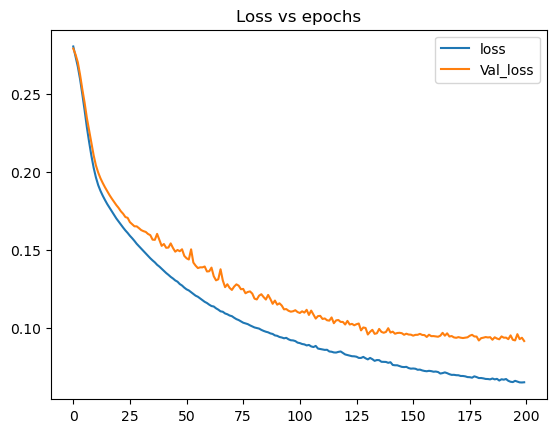

In [250]:
plt.plot(np.sqrt(r.history['loss']),label = 'loss')
plt.plot(np.sqrt(r.history['val_loss']),label = "Val_loss")
plt.legend()
plt.title("Loss vs epochs")

In [251]:
print("Train score:", model.evaluate(X_train,y_train))
print("Test score:", model.evaluate(X_test,y_test))

16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Train score: 0.0041419765911996365
5/5 [==============================] - 0s 2ms/step - loss: 0.0084
Test score: 0.008358416147530079


In [252]:
predictions_train= model.predict(X_train).flatten()

16/16 [==============================] - 0s 1ms/step


In [253]:
predictions = model.predict(X_test).flatten()
print(predictions)
print(y_test)
print(predictions.shape)
print(y_test.shape)


5/5 [==============================] - 0s 3ms/step
[0.9611182  0.8857813  0.88071215 0.87213963 0.880662   0.8696387
 0.85796136 0.8513411  0.84559846 0.87436    0.8510601  0.83650094
 0.8212188  0.81086695 0.81783026 0.79961306 0.7878987  0.76245165
 0.75617975 0.7607416  0.74512124 0.7113504  0.7097895  0.7097935
 0.7809523  0.73834723 0.7142786  0.7097549  0.69953007 0.7050541
 0.6808555  0.67910075 0.64840317 0.63769203 0.6576053  0.6385377
 0.60579014 0.6139456  0.584485   0.7094272  0.61755496 0.62640285
 0.5950838  0.59944314 0.58613604 0.8615511  0.6919765  0.6733083
 0.6490045  0.6282446  0.6509558  0.61613405 0.55480695 0.5490154
 0.5792343  0.69018114 0.6078331  0.5755679  0.52881527 0.53870654
 0.5491803  0.516999   0.5017032  0.4788634  0.46526203 0.5037747
 0.46090484 0.43454638 0.43504003 0.43126684 0.5160594  0.46901008
 0.41729832 0.42408687 0.40824744 0.42702296 0.35805547 0.3848197
 0.3689713  0.31619304 0.3889211  0.30792153 0.31651372 0.30204335
 0.2813761  0.43841

In [254]:
mse_train = mean_squared_error(y_train,predictions_train)
print(mse_train)
rmse_train = np.sqrt(mse_train)
print(rmse_train)
target_range = np.max(y_train) - np.min(y_train)
print(target_range)
rmse_percentage = (rmse_train / target_range) * 100
print(f"rmse_train%: {rmse_percentage}%")

0.004141976873183098
0.06435819196639304
1.0
rmse_train%: 6.435819196639304%


In [255]:
mse = mean_squared_error(y_test,predictions)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
target_range = np.max(y_test) - np.min(y_test)
print(target_range)
rmse_percentage = (rmse / target_range) * 100
print(f"rmse_test%: {rmse_percentage}%")



0.008358417667193009
0.09142438223577455
1.0
rmse_test%: 9.142438223577456%


In [256]:
r2 = r2_score(y_test,predictions)
print(f"r2_score: {r2}")

r2_score: 0.9012072738885157


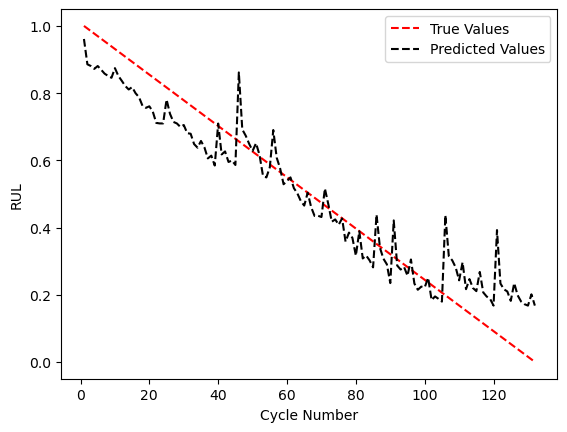

In [257]:
cycles = np.arange(1,133)
plt.Figure(figsize=(8,6))
plt.plot(cycles,y_test,color='red', linestyle='--',label="True Values")
plt.plot(cycles,predictions,color='black', linestyle='--',label = "Predicted Values")
plt.xlabel("Cycle Number")
plt.ylabel("RUL")
plt.legend()
plt.show()


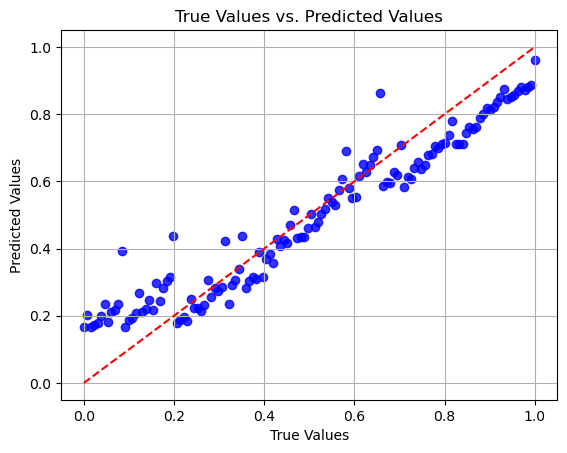

In [258]:

plt.Figure(figsize=(8,6))
plt.scatter(y_test,predictions,c='b', marker = None, alpha =0.8)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [259]:
model.save("Model.h5")
model.save("Model")

C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: Model\assets


INFO:tensorflow:Assets written to: Model\assets
